### **Machine Learning** ###

Disciplina del campo de la Inteligencia Artificial que, a través de algoritmos, dota a los ordenadores de la capacidad de identificar patrones en datos masivos y elaborar predicciones (análisis predictivo).

**Tipos de algoritmos para Aprendizaje máquina con TensorFlow:**
1. Regresión Lineal
2. Clasificación
3. Clustering
4. Modelo oculto de Markov

**[Regresión Lineal](https://www.tensorflow.org/tutorials/estimator/linear):**

Una de las formas más básicas de Machine Learning. Se utiliza para predecir valores numéricos.
La regresión lineal sigue el siguiente concepto: si los puntos están relacionados de manera lineal, podemos generar una línea de mejor ajuste (línea recta que se ajusta de manera óptima a un conjunto de datos, de manera que minimiza la suma de los cuadrados de las diferencias verticales entre los puntos de datos reales y los puntos en la línea) y utilizarla para predecir valores futuros.
Para dos dimensiones, la ecuación sería y = mx + b
Ejemplo visual:

Matplotlib is building the font cache; this may take a moment.


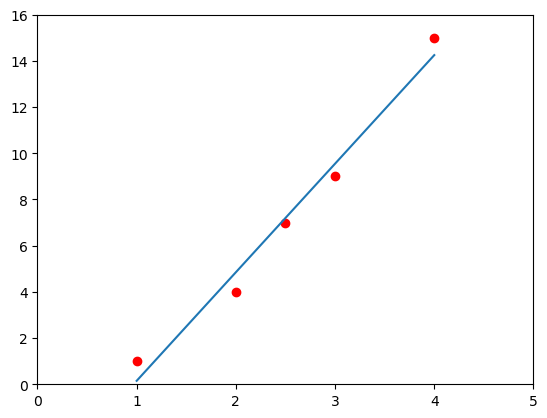

In [2]:
import matplotlib.pyplot as plt   ## Manipulación de Gráficos
import numpy as np

x = [1, 2, 2.5, 3, 4]                                                ## Vector de valores de datos del eje x
y = [1, 4, 7, 9, 15]                                                 ## Vector de valores de datos del eje y
plt.plot(x, y, 'ro')                                                 ## Crea los puntos (x, y) de los vectores de entrada 
plt.axis([0, 5, 0, 16])                                              ## Define la medida del área del gráfico x = (0, 5), y = (0, 16)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x))) ## Calcula la Línea de Mejor Ajuste
plt.show()                                                           ## Dibuja el gráfico definido (en este caso, es el gráfico por defecto)

En el siguiente ejemplo, vamos a utilizar un modelo Lineal para predecir el % de supervivientes del Titanic.

**Módulos:**

* __ future __ --> Permite a los desarrolladores utilizar características que se introducirán en futuras versiones de Python antes de que estas características se conviertan en el comportamiento predeterminado.
* numpy --> Realizar operaciones numéricas y manipulación de datos en arreglos multidimensionales (manipulación de Arrays).
* pandas --> Proporciona estructuras de datos flexibles y herramientas de manipulación de datos que facilitan la limpieza, exploración y análisis de conjuntos de datos.
* matplotlib.pyplot --> Manipulación de Gráficos
* scikit-learn --> Conjunto de rutinas escritas en Python para hacer análisis predictivo, que incluyen clasificadores, algoritmos de clusterización, etc.

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt          ## Manipulación de Gráficos
from IPython.display import clear_output ## Limpieza de celdas de salida en entornos interactivos como JupyterLab
from six.moves import urllib             ## Funcionalidades de manejo de URL sin preocuparte por las diferencias entre las versiones de Python.    

import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

**Cargar datos de entrada:**

In [ ]:
## Carga del Dataset con "pandas"
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') ## Datos de Entrenamiento
dfeval  = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')  ## Datos de Evaluación
print(dftrain.head())                                                                 ## Visualizar cabeceras y primeros registros
y_train = dftrain.pop('survived')                                                     ## Eliminamos la Etiqueta o valor a predecir del Dataset inicial
y_eval  = dfeval.pop('survived')                                                      ## Eliminamos la Etiqueta o valor a predecir del Dataset inicial
print(dftrain.head()) 
print(y_train)                                                                        ## Visualizar Dataset y número de registros
print(dftrain.loc[0], y_train.loc[0])                                                 ## Visualizar registros concretos datos su identificador de línea
print(dftrain["age"])                                                                 ## Visualizar columna concreta del Dataset
print(dftrain["age"].unique())                                                        ## Visualizar valores únicos de una columna concreta

In [ ]:
dftrain.head() ## Visualizar cabeceras y primeros registros

In [ ]:
dftrain.describe() ## Análisis del Dataset

In [ ]:
dftrain.shape ## Número de Registros y Número de Columnas

**Visualización de distintos aspectos de los datos de entrada:**


In [ ]:
dftrain.age.hist(bins=20) ## Histograma de la columna "age" (x = "age", y = número de registros)

In [ ]:
dftrain.sex.value_counts().plot(kind='barh') ## Gráfico de barras horizontales que muestra la cantidad de valores de cada tipo

In [ ]:
dftrain['class'].value_counts().plot(kind='barh') ## Gráfico de barras horizontales que muestra la cantidad de valores de cada tipo

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive') ## Muestra el porcentaje de personas supervivientes por Sexo

**Dataset de Entrenamiento vs Dataset de Evaluación:**


In [ ]:
print(dftrain.shape) ## Número de Registros y Número de Columnas
print(dfeval.shape)  ## Número de Registros y Número de Columnas

In [ ]:
categorical_columns = ["sex", "n_siblings_spouses", "parch", "class", "deck", "embark_town", "alone"] ## Columnas de Características
numeric_columns = ["age", "fare"]                                                                     ## Columnas Numéricas

feature_columns = []
for feature_name in categorical_columns:                                                                        ## Por cada columna en la lista de Categorías
    vocabulary = dftrain[feature_name].unique()                                                                 ## Recuperamos todos los valores únicos de la columna actual
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)) ## Incluimos la información de la columna en la lista "feature_columns"

for feature_name in numeric_columns:                                                                            ## Por cada columna en la lista de Numéricas
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))                    ## Incluimos la información de la columna en la lista "feature_columns"

print(feature_columns)

**Proceso de Entrenamiento:**
1. Carga de datos de entrada en el Modelo.

Con el Modelo que vamos a utilizar, no se pasa todo el Dataset completo, si no que se pasan lotes de 32. De echo, vamos a pasar estos lotes varias veces, tantas como Épocas.

Una Época es una transferencia completa de nuestro Dataset de entrada.

Como debemos cargar los datos en el Modelo en lotes y varias veces, necesitamos una función de carga (imput function) para convertir nuestro Dataset en lotes en cada Época.

Función de Entrada: El [modelo que vamos a utilizar](https://www.tensorflow.org/tutorials/estimator/linear) requiere los datos de entrada como objetos "tf.data.Dataset". La función de entrada debe convertir nuestro DataFrame de pandas a este tipo de objeto (partiendo en Épocas y lotes).

In [ ]:
## data_df: Columnas de características
## label_df: Columnas de Etiquetas (Resultados)
## num_epochs: Número de Épocas que entrenará el Modelo
## training: Indica si se utiliza la función para entrenamiento o evaluación
## batch_size: Número de elementos de los Lotes de entrada para el Modelo
def make_input_fn(data_df, label_df, num_epochs=2, training=True, batch_size=32):
    def input_function():                                                         ## Función que se crea y será devuelta como resultado
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))        ## Creamos un objeto de tipo "tf.data.Dataset" con los datos de entrada
        if training:
            ds = ds.shuffle(1000)                                                 ## Orden aleatorio de los datos
        ds = ds.batch(batch_size).repeat(num_epochs)                              ## Partimos el Dataset de entrada en lotes de 32 elementos y repetimos la operación para cada época
        return ds
    return input_function

2. Creación del Modelo: Estimador Linel

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

3. Entrenamiento del Modelo

In [ ]:
train_input_fn = make_input_fn(dftrain, y_train)
linear_est.train(train_input_fn)

4. Evaluación del Modelo

In [ ]:
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, training=False)
result = linear_est.evaluate(eval_input_fn)
clear_output()
print(result['accuracy'])

Podemos revisar casos concretos si lo deseamos

In [ ]:
result = list(linear_est.predict(eval_input_fn)) ## Predicción registro por registro
clear_output()
print(dfeval.loc[0])                 ## Datos del registro N del Dataset de evaluación
print(y_eval.loc[0])                 ## Resultado del registro N del Dataset de evaluación.
print(result[0]['probabilities'][1]) ## Probabilidad de vivir según la predicción del Modelo

**[Clasificación](https://www.tensorflow.org/tutorials/estimator/premade):**

Se utiliza para separar datos de entrada en Clases de distintas Etiquetas.

En el siguiente ejemplo, vamos a clasificar Flores.
Los datos de entrada (Dataset) que vamos a utilizar separa las Flores en Setosa(0), Versicolor(1) y Virginica(2). Aporta los siguientes datos para cada Flor:
* Longitud del sépalo
* Anchura del sépalo
* Longitud del pétalo
* Anchura del pétaloalo

**Módulos:** (Importados en el apartado previo)

* __ future __
* tensorflow
* pandas

In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'] ## Lista con las columnas del Dataset
SPECIES = ['Setosa', 'Versicolor', 'Virginica']                                          ## Lista con las posibles Clasificaciones


**Cargar datos de entrada:**

In [ ]:
## Carga del Dataset con "keras" y "pandas"
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

print(train.head())            ## Visualizar cabeceras y primeros registros
train_y = train.pop('Species') ## Eliminamos la Etiqueta o valor a predecir del Dataset inicial
test_y  = test.pop('Species')  ## Eliminamos la Etiqueta o valor a predecir del Dataset inicial
print(train.head()) 
print(train.keys())

**Dataset de Entrenamiento vs Dataset de Evaluación:**


In [ ]:
print(train.shape) ## Número de Registros y Número de Columnas
print(test.shape)  ## Número de Registros y Número de Columnas

**Proceso de Entrenamiento:**

Definimos un Modelo usando un Estimador de TensorFlow. Un estimador es cualquier clase derivada de "tf.estimator.Estimator".

Tareas a realizar:

* Crear función de entrada (imput function).
* Definir las columnas de características del modelo.
* Crear una instancia de un Estimador, especificando las columnas de características y varios hiperparámetros.
* Llamar a uno o más métodos en el objeto Estimator, pasando la función de entrada adecuada como fuente de los datos.

**Función de Entrada:**

El [modelo que vamos a utilizar](https://www.tensorflow.org/tutorials/estimator/premade) requiere los datos de entrada como objetos "tf.data.Dataset". La función de entrada debe convertir nuestro DataFrame de pandas a este tipo de objeto (partiendo en Épocas y lotes).

In [ ]:
## features: Columnas de características
## labels: Columnas de Etiquetas (Resultados)
## training: Indica si se utiliza la función para entrenamiento o evaluación
## batch_size: Número de elementos de los Lotes de entrada para el Modelo
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels)) ## Creamos un objeto de tipo "tf.data.Dataset" con los datos de entrada
    if training:
        dataset = dataset.shuffle(1000).repeat()                           ## Orden aleatorio de los datos                                  
    return dataset.batch(batch_size)                                       ## Partimos el Dataset de entrada en lotes de 256 elementos

**Columnas de características:**

Una columna de características es un objeto que describe cómo el modelo debe usar los datos de entrada sin procesar del diccionario de características. Cuando crea un modelo de Estimator, le pasa una lista de columnas de características que describen cada una de las características que desea que use el modelo. El módulo "tf.feature_column" proporciona muchas opciones para representar datos en el modelo. En este caso, todos los valores de entrada son numéricos; por tanto, no es necesario trabajar con vocabularios.

In [ ]:
my_feature_columns = []
for key in train.keys():                                                  ## Para cada Columna del DataFrame
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))  ## La cargamos en la lista de Columnas de Características

**Costrucción del Modelo:**

TensorFlow proporciona varios Estimadores clasificadores prefabricados, que incluyen:

* tf.estimator.DNNClassifier (Deep Neural Network) para modelos profundos que realizan clasificación multiclase.
* tf.estimator.LinearClassifier para clasificadores basados ​​en modelos lineales.
* tf.estimator.DNNLinearCombinedClassifier para modelos amplios y profundos.

Para el problema de Iris, tf.estimator.DNNClassifier parece ser la mejor opción.

In [ ]:
# Construimos una Red Neuronal Profunda (DNN) con 2 capas ocultas de 30 y 10 nodes respectivamente. Debe clasificar en tres clases.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[30, 10],
    n_classes=3)

**Entrenamiento del Modelo:**

En el siguiente código, se envuelve la llamada a la función "input_fn" en una **lambda** para capturar los argumentos mientras proporciona una función de entrada que no toma argumentos, como lo espera el Estimador. El argumento de steps le dice al método que detenga el entrenamiento después de una serie de pasos de entrenamiento.

Por ejemplo, se podría escribir el siguiente código:

x = lambda: print("Hola")

x()

In [ ]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

**Evaluación del Modelo:**

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

**Prediciones con el Modelo:**

Ahora se puede usar el modelo entrenado para predecir la especie de una flor de iris en función de algunas medidas no etiquetadas.

In [ ]:
# Igual que la función de entrada, pero sin etiquetas
def input_fn(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Introduce el valor solicitado en formato x.y")
for feature in features:
    valid = True
    while valid:
        val = input(feature + ": ")
        if not val.isdigit(): valid = False

    predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    print(pred_dict)
    class_id = pred_dict['class_ids'][0]
    print(class_id)
    probability = pred_dict['probabilities'][class_id]
    print(probability)

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))

**[Clustering](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68):**

Clustering es una técnica de Machine Learning que trabaja en la agrupación de Puntos de Datos. En teoría, aquellos puntos que estén en el mismo grupo, deberían tener propiedades y/o características similares.

KMeans es un algoritmo de aprendizaje no supervisado utilizado para el análisis de clústeres. Su objetivo principal es agrupar un conjunto de datos en k clústeres basándose en similitudes entre las muestras.

**Algoritmo K-Means Clustering:**

1. Coger K puntos para colocar K centroides.
2. Asignar todos los puntos a los centroides por distancia. Cada punto queda asignado al centroide más cercano.
3. Encontrar el punto medio (centro de masa) de todos los puntos pertenecientes a cada centroide. Colocar los centroides en cada uno de los puntos medios.
4. Reasignar todos los puntos de nuevo a los centroides por distancia.
5. Repetir los puntos 3-4 hasta que ningún punto cambie el centroide al que pertenece.

NO TENGO UN EJEMPLO SOBRE CÓDIGO PARA CUSTERING

**[Modelo Oculto de Marcov](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel):**

El Modelo Oculto de Marcov es un conjunto finito de estados, cada uno de los cuales está asociado con una distribución de probabilidades (generalmente multidimensional). Las transiciones entre los estados están gobernadas por un conjunto de probabilidades llamadas "Probabilidades de Transición".

El modelo trabaja con probailidades para predecir eventos o estados futuros. En el siguiente ejemplo creamos un Modelo oculto de Marcov para predecir el tiempo.

**Datos de entrada:**

Para trabajar con un Modelo Oculto de Marcov sólo nos interesan las distribuciones de probabilidades que tengan que ver con las transiciones entre los distintos estados. A continuación se muestran los componentes del modelo:

* **Estados**: Conjunto finito de Estados. Estos estados están ocultos; es decir, no los observamos directamente. Ejemplos ("calido"/"frio") o ("alto"/"bajo") o ("rojo"/"verde"/"azul").
* **Observaciones**: Cada estado tiene una observación asociada, basada en una distribución de probabilidades. Ejemplo (En un día calido Tim tiene un 80% de probabilidades de estar feliz y un 20% de estar triste).
* **Transiciones**: Cada estado tendrá una probabilidad de transición a un estado diferente. Ejemplo (un día frío tiene un 30% de probabilidad de dar paso a un día calido y un 70% de probabilidad de dar paso a otro día frío).

**Módulos:**

In [7]:
import tensorflow_probability as tfp
import tensorflow as tf

**Módelo del Clima:**

Vamos a modelar un sistema simple de Clima y tratar de predecir la temperatura de cada día dada la siguiente información:
1. Los días fríos se codifican como 0 y los cálidos como 1.
2. El primer día de nuestra secuencia tiene 80% de probabilidad de ser frío.
3. Un día frío tiene un 30% de probabilidad de dar paso a un día calido.
4. Un día cálido tiene un 20% de probabilidad de dar paso a un día frío.
5. Cada día la temperatura está distribuida de forma normal; es decir, con una desviación estandar de 0 y 5 en un día frío y de 15 y 10 en un día calido. Desviación estandar (en este ejemplo, la temperatura media en un día calido sería de 15 grados y un rango de min 5 max 25).

In [ ]:
tfd = tfp.distributions                                                # Para no tener que escribir siempre tfp.distributions
initial_distribution = tfd.Categorical(probs=[0.8, 0.2])               # Se refiere al punto 2 de la descripción (asignamos primero la probabilidad de frío y segundo la probabilidad de calido)
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],           # Se refiere al punto 3 de la descripción (asignamos primero la probabilidad de frío y segundo la probabilidad de calido)
                                                [0.2, 0.8]])           # Se refiere al punto 4 de la descripción (asignamos primero la probabilidad de frío y segundo la probabilidad de calido)
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # Se refiere al punto 5 de la descripción... loc (Media) y Scale (Desviación Estandar) (asignamos primero los valores para frío y segundo los valores para calido)

model = tfd.HiddenMarkovModel(
    initial_distribution = initial_distribution,
    transition_distribution = transition_distribution,
    observation_distribution = observation_distribution,
    num_steps = 7) # El número de pasos representa los días que queremos predecir

**Ejecución del Modelo:**

Ejecutamos el modelo para predecir el tiempo (grados) que hará en los próximos 7 días.

In [ ]:
mean = model.mean()
with tf.compat.v1.Session() as sess:
    print(mean.numpy())